# EDA

## Reference Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
reference_data = pd.read_csv("/kaggle/input/ing-hubs-turkiye-datathon/referance_data.csv")

In [3]:
reference_data.head()

,cust_id,ref_date,churn
0,0,2017-09-01,0
1,3,2018-10-01,0
2,5,2018-03-01,1
3,6,2018-04-01,1
4,7,2018-05-01,0


In [4]:
reference_data.groupby("churn").agg({"ref_date":"max"})

,ref_date
churn,
0,2018-12-01
1,2018-12-01


In [5]:
reference_data.shape

(133287, 3)

In [ ]:
reference_data.isnull().sum()

In [7]:
reference_data.cust_id.nunique()

133287

In [8]:
reference_data.sort_values(by="ref_date",inplace=True)

In [9]:
reference_data["ref_date"] = pd.to_datetime(reference_data["ref_date"])

In [10]:
reference_data["ref_date"].nunique()

18

In [14]:
reference_data

,cust_id,ref_date,churn
55601,83430,2017-07-01,0
117414,176246,2017-07-01,0
17737,26428,2017-07-01,0
57393,86085,2017-07-01,0
57391,86082,2017-07-01,0
...,...,...,...
81332,122101,2018-12-01,0
96618,144983,2018-12-01,0
81325,122092,2018-12-01,0
58539,87796,2018-12-01,0


In [11]:
ref_cnt = reference_data["ref_date"].value_counts().reset_index().sort_values(by="ref_date")

In [12]:
ref_cnt

,ref_date,count
4,2017-07-01,7453
0,2017-08-01,7636
7,2017-09-01,7431
1,2017-10-01,7590
16,2017-11-01,7229
13,2017-12-01,7346
3,2018-01-01,7474
9,2018-02-01,7410
5,2018-03-01,7436
2,2018-04-01,7569


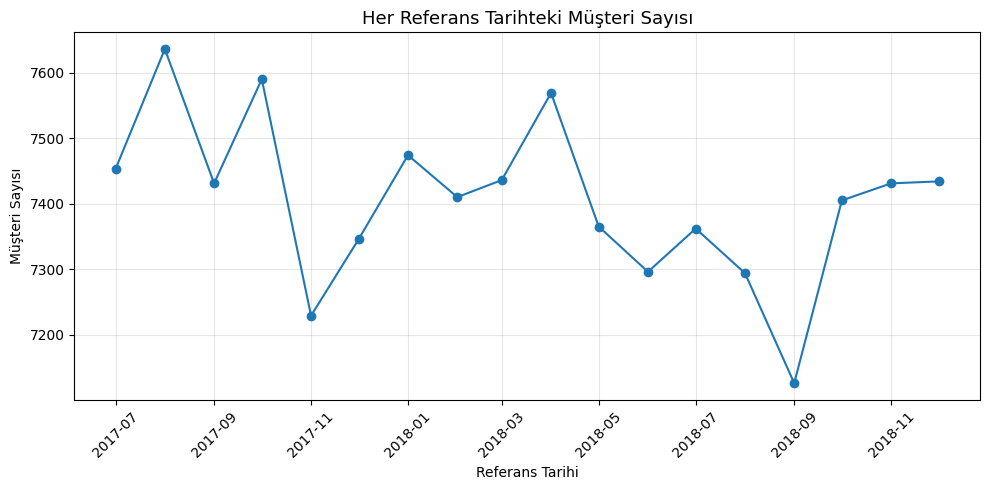

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ref_cnt["ref_date"], ref_cnt["count"], marker="o", linestyle="-")
plt.title("Her Referans Tarihteki Müşteri Sayısı", fontsize=13)
plt.xlabel("Referans Tarihi")
plt.ylabel("Müşteri Sayısı")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
reference_data["churn"].value_counts()

In [ ]:
ref_ratio = reference_data.groupby("ref_date")["churn"].value_counts().reset_index()

In [ ]:
# Her ref_date için toplam müşteri
ref_ratio["total"] = ref_ratio.groupby("ref_date")["count"].transform("sum")

# Churn oranı (churn=1 / toplam)

ref_ratio["churn_rate"] = ref_ratio["count"] / ref_ratio["total"]

# Sadece churn=1 satırlarını al
churn_trend = ref_ratio[ref_ratio["churn"] == 1]

In [ ]:
ref_ratio

In [ ]:
import seaborn as sns

# Görselleştirme
plt.figure(figsize=(10,5))
sns.lineplot(data=churn_trend, x="ref_date", y="churn_rate", marker="o", linewidth=2, color="tomato")

plt.title("Aylık Churn Oranı (%)", fontsize=13, weight="bold")
plt.xlabel("Referans Tarihi")
plt.ylabel("Churn Oranı")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [24]:
churn_list = reference_data[reference_data["churn"] == 1]["cust_id"].to_list()

Veri kümesinde 133.287 müşteri bulunmaktadır.

Churn dağılımı: 114.417 (0) – 18.870 (1) olup, pozitif sınıf oranı yaklaşık %14.15 civarındadır.

Her ay ortalama 7.000–7.600 civarında müşteri bulunmaktadır.

Churn oranı dönemsel olarak %10–17 arasında değişiyor; 2017’nin ortasında yüksekken 2018 boyunca kademeli biçimde azalmış. Bu da müşteri bağlılığının zamanla güçlendiğini ve elde tutma stratejilerinin etkili olduğunu gösteriyor. Genel ortalama churn oranı yaklaşık %15 civarında seyrediyor. Test verisinde de bu düşmeye devam edebilir.

## Customers

In [ ]:
customers = pd.read_csv("/kaggle/input/ing-hubs-turkiye-datathon/customers.csv")

In [ ]:
customers.head()

In [ ]:
customers.isnull().sum()

In [ ]:
cust_analyse = reference_data.merge(customers,on="cust_id",how="left")

In [ ]:
customers["gender"] = customers["gender"].map({"M":1,"F":0})

In [ ]:
customers["province"].value_counts()

In [ ]:
customers["religion"].value_counts()

In [ ]:
cust_analyse.groupby("religion").agg(
    churned=("churn", "sum"),
    total=("religion", "count"),
    churn_rate=("churn", lambda x: x.mean())
)


In [ ]:
customers["work_type"].value_counts()

In [ ]:
cust_analyse.groupby("work_type").agg(
    churned=("churn", "sum"),
    total=("work_type", "count"),
    churn_rate=("churn", lambda x: x.mean())
)

In [ ]:
customers["work_sector"].value_counts()

In [ ]:
cust_analyse.groupby("work_sector").agg(
    churned=("churn", "sum"),
    total=("work_sector", "count"),
    churn_rate=("churn", lambda x: x.mean())
)

In [ ]:
customers.groupby("work_sector")["age"].mean()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# churn_count dataframe'in (senin agg sonucu)
age_churn = cust_analyse.groupby("age").agg(
    churned=("churn", "sum"),
    total=("age", "count"),
    churn_rate=("churn", lambda x: x.mean())
).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=age_churn, x="age", y="churned", color="steelblue", marker="o")
plt.title("Yaşa Göre Churn Eden Müşteri Sayısı", fontsize=13, weight="bold")
plt.xlabel("Yaş")
plt.ylabel("Churn Eden Müşteri Sayısı")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=age_churn, x="age", y="churn_rate", color="tomato", marker="o")
plt.title("Yaşa Göre Churn Oranı", fontsize=13, weight="bold")
plt.xlabel("Yaş")
plt.ylabel("Churn Oranı")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
customers.groupby("work_sector")["tenure"].mean()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# churn_count dataframe'in (senin agg sonucu)
tenure_churn = cust_analyse.groupby("tenure").agg(
    churned=("churn", "sum"),
    total=("tenure", "count"),
    churn_rate=("churn", lambda x: x.mean())
).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=tenure_churn, x="tenure", y="churned", color="steelblue", marker="o")
plt.title("Tenure Göre Churn Eden Müşteri Sayısı", fontsize=13, weight="bold")
plt.xlabel("Tenure")
plt.ylabel("Churn Eden Müşteri Sayısı")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=tenure_churn, x="tenure", y="churn_rate", color="steelblue", marker="o")
plt.title("Tenure Göre Churn Rate", fontsize=13, weight="bold")
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
customers.groupby("work_type")["age"].mean()

In [ ]:
customers.groupby("work_type")["tenure"].mean()

In [ ]:
customers[customers["work_sector"].isnull()]["age"].mean()

In [ ]:
customers[customers["work_sector"].isnull()]["work_type"].value_counts()

Veriye göre en fazla müşteri perakende, teknoloji ve sağlık sektörlerinde çalışıyor; ortalama yaş tüm sektörlerde 42 civarında ve sektör farkı oldukça az. 
Yaşa Göre Churn Analizi

Churn eden müşteri sayısı 25–35 yaş aralığında en yüksek, sonrasında yaş ilerledikçe kademeli biçimde azalıyor.
Churn oranı genç yaşlarda %12–16 bandında seyrederken, özellikle 30’lu yaşlarda hafif artışlar gözleniyor; bu da genç yetişkin müşterilerin daha hareketli ve kurum değiştirmeye yatkın olduğunu gösteriyor.

Tenure arttıkça churn eden müşteri sayısı ve oranı genel olarak azalma eğiliminde.
İlk 50–100 ay arasında churn oranı daha yüksekken, 200 ay üzerindeki müşterilerde bağlılık belirgin biçimde artıyor.
Bu durum, uzun süredir sistemde bulunan müşterilerin daha sadık olduğunu, churn riskinin özellikle yeni ve orta tenure sahip müşterilerde yoğunlaştığını gösteriyor.

## Customer History

In [18]:
customer_history = pd.read_csv("/kaggle/input/ing-hubs-turkiye-datathon/customer_history.csv")

In [ ]:
customer_history.head()

In [ ]:
customer_history["date"] = pd.to_datetime(customer_history["date"])

In [ ]:
customer_history.shape

In [ ]:
customer_history.cust_id.nunique()

In [ ]:
customer_history.isnull().sum()

In [ ]:
customer_history

In [ ]:
import pandas as pd

# df senin DataFrame'in olsun
cols = [
    "mobile_eft_all_cnt",
    "active_product_category_nbr",
    "mobile_eft_all_amt",
    "cc_transaction_all_amt",
    "cc_transaction_all_cnt"
]

# Her sütunda 0 veya NaN olan satır sayısını bul
zero_nan_summary = (
    customer_history[cols]
    .apply(lambda s: ((s == 0) | (s.isna())).sum())
    .to_frame("zero_or_nan_count")
)

# Toplam satır sayısını da ekleyelim
zero_nan_summary["total_rows"] = len(customer_history)
zero_nan_summary["ratio_%"] = 100 * zero_nan_summary["zero_or_nan_count"] / zero_nan_summary["total_rows"]

zero_nan_summary


In [ ]:
cols = [
    "mobile_eft_all_cnt",
    "mobile_eft_all_amt",
    "cc_transaction_all_amt",
    "cc_transaction_all_cnt"
]

# Bu sütunların hepsi 0 olan satırları seç
mask = (customer_history[cols] == 0).all(axis=1)
df_all_zero = customer_history[mask]

print(f"Hepsi 0 olan satır sayısı: {len(df_all_zero)}")
df_all_zero.head()


In [ ]:
all_zero = df_all_zero["cust_id"].to_list()

In [ ]:
reference_data[reference_data["cust_id"].isin(all_zero)]["churn"].value_counts(dropna=False)

In [ ]:
churn_customer = customer_history[customer_history["cust_id"].isin(churn_list)]

In [ ]:
churn_customer

In [20]:
cust_list = reference_data["cust_id"].unique()

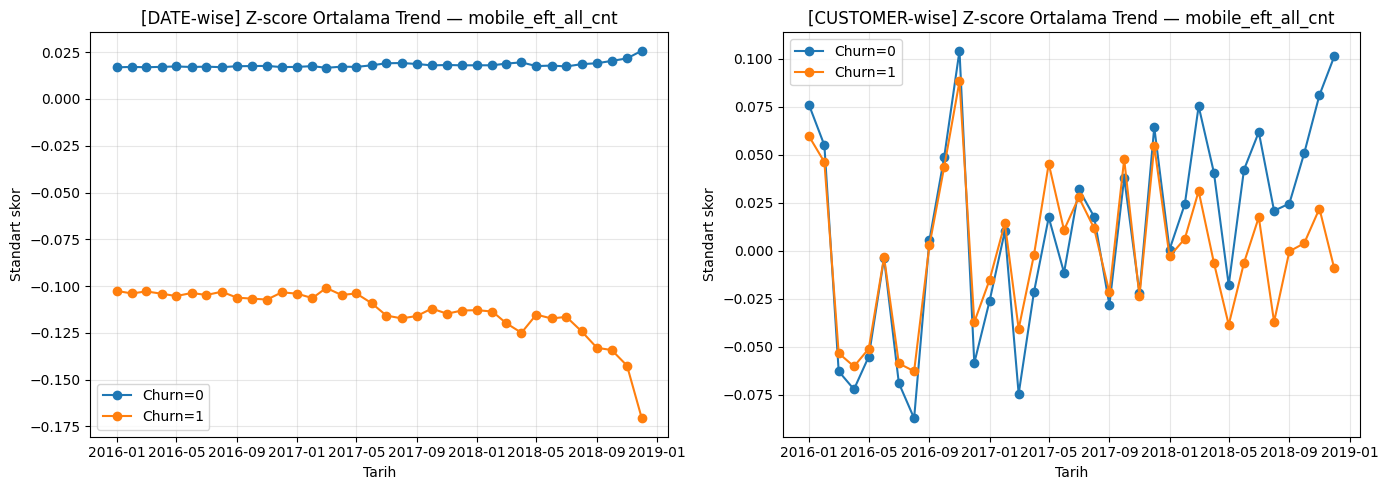

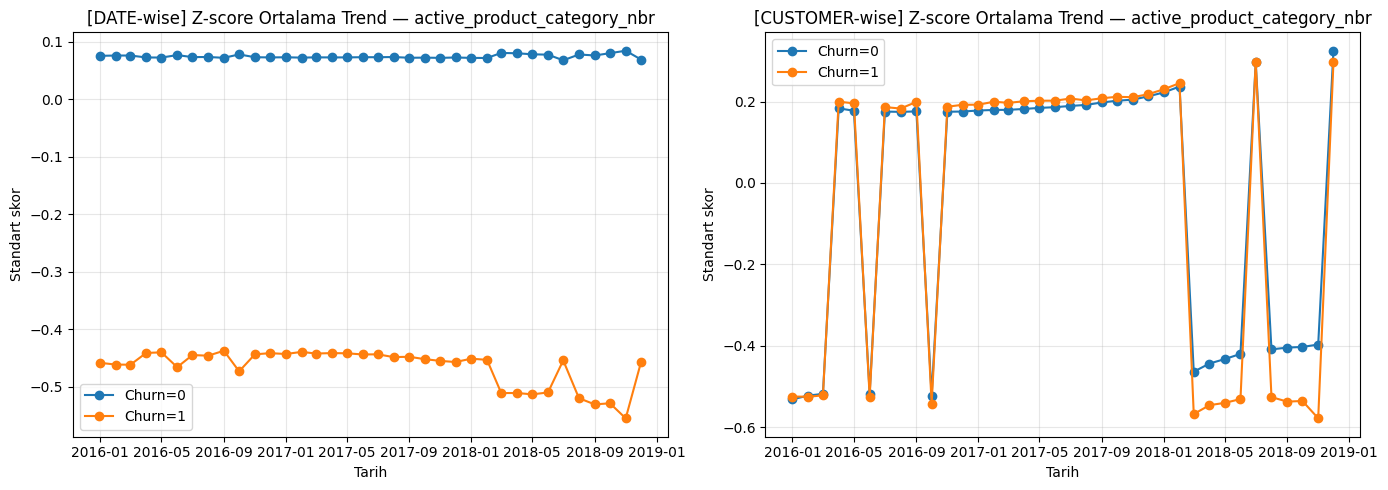

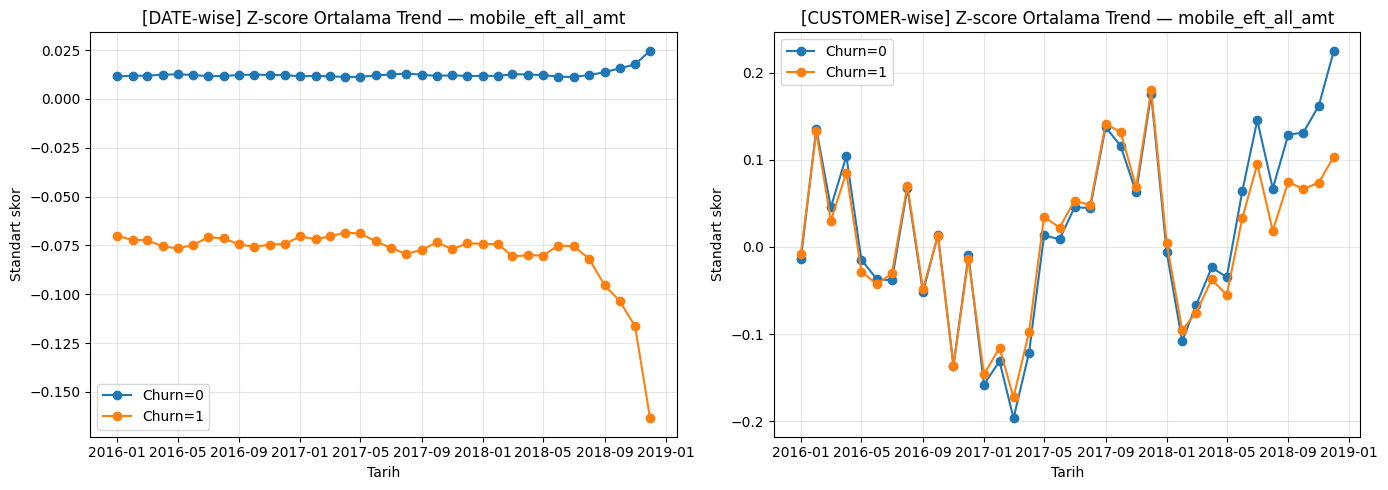

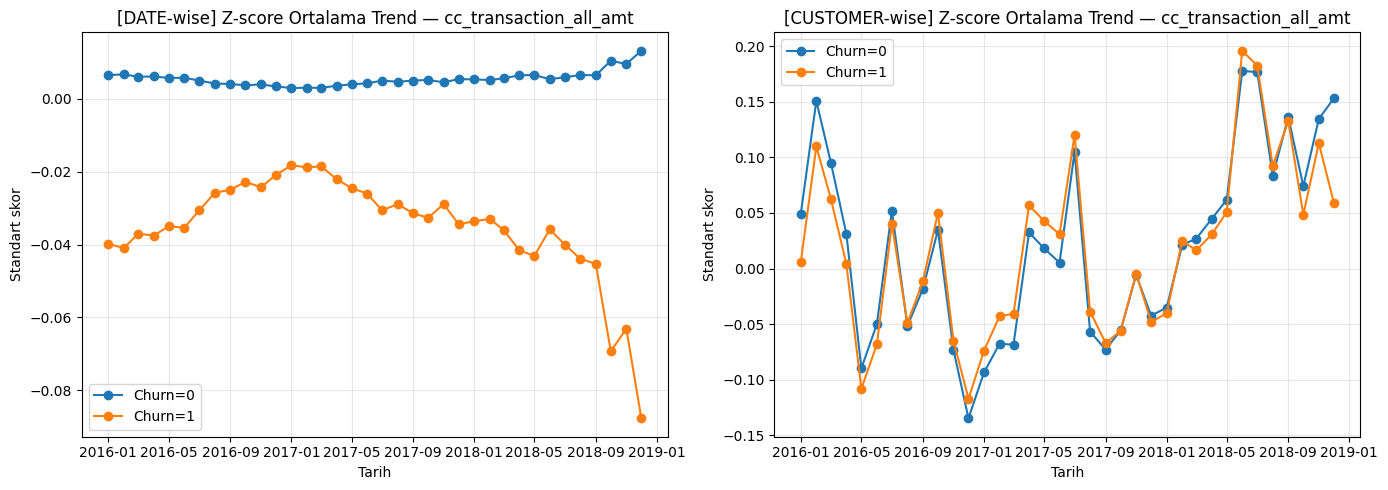

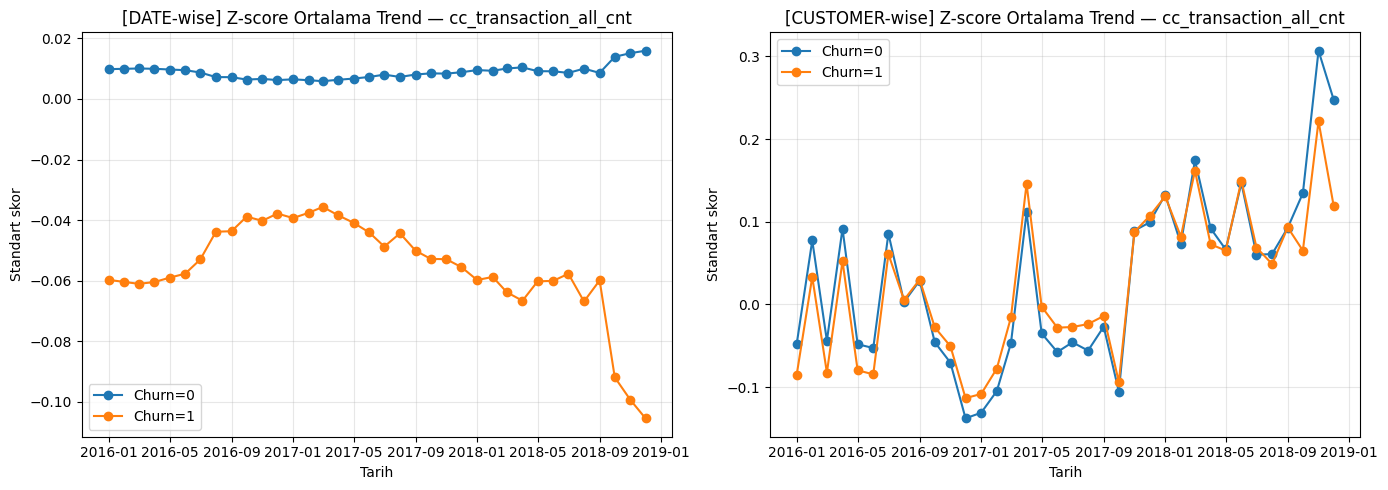


==== DATE-wise (aynı ay içinde karşılaştırma) ==== 
- mobile_eft_all_cnt: ortalama delta=-0.132, medyan delta=-0.129, son ay delta=-0.197
- active_product_category_nbr: ortalama delta=-0.541, medyan delta=-0.524, son ay delta=-0.527
- mobile_eft_all_amt: ortalama delta=-0.092, medyan delta=-0.087, son ay delta=-0.188
- cc_transaction_all_amt: ortalama delta=-0.041, medyan delta=-0.039, son ay delta=-0.101
- cc_transaction_all_cnt: ortalama delta=-0.065, medyan delta=-0.065, son ay delta=-0.121

==== CUSTOMER-wise (müşterinin kendi geçmişine göre) ==== 
- mobile_eft_all_cnt: ortalama delta=-0.011, medyan delta=-0.004, son ay delta=-0.110
- active_product_category_nbr: ortalama delta=-0.021, medyan delta=+0.008, son ay delta=-0.029
- mobile_eft_all_amt: ortalama delta=-0.010, medyan delta=+0.001, son ay delta=-0.121
- cc_transaction_all_amt: ortalama delta=-0.003, medyan delta=+0.002, son ay delta=-0.094
- cc_transaction_all_cnt: ortalama delta=-0.006, medyan delta=+0.002, son ay delta=

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 0) Hazırlık
# =========================
df = customer_history.copy()
df = df[df["cust_id"].isin(cust_list)]
df["date"] = pd.to_datetime(df["date"])
num_cols = ["mobile_eft_all_cnt", "active_product_category_nbr",
            "mobile_eft_all_amt", "cc_transaction_all_amt", "cc_transaction_all_cnt"]

# eksikleri 0 ile doldur (istersen median ile değiştirilebilir)
df[num_cols] = df[num_cols].fillna(0)
df["churn_flag"] = df["cust_id"].isin(churn_list).astype(int)

# Yardımcı: güvenli z-score (std=0 ise 0 döndür)
def _safe_z(x):
    s = x.std(ddof=0)
    if s == 0 or np.isnan(s):
        return x*0
    return (x - x.mean()) / s

# =========================
# 1) DATE-WISE Standartlaştırma
# =========================
df_date_scaled = df.copy()
df_date_scaled[num_cols] = df_date_scaled.groupby("date")[num_cols].transform(_safe_z)

trend_date = (df_date_scaled
              .groupby(["date","churn_flag"])[num_cols].mean()
              .reset_index())

# pivot: her metrik için churn0/churn1 yan yana
trend_date_pv = trend_date.pivot(index="date", columns="churn_flag", values=num_cols)
trend_date_pv.columns = [f"{c[0]}_churn{c[1]}" for c in trend_date_pv.columns]
trend_date_pv = trend_date_pv.sort_index()

# =========================
# 2) CUSTOMER-WISE Standartlaştırma
# =========================
df_cust_scaled = df.copy()
df_cust_scaled[num_cols] = df_cust_scaled.groupby("cust_id")[num_cols].transform(_safe_z)

trend_cust = (df_cust_scaled
              .groupby(["date","churn_flag"])[num_cols].mean()
              .reset_index())

trend_cust_pv = trend_cust.pivot(index="date", columns="churn_flag", values=num_cols)
trend_cust_pv.columns = [f"{c[0]}_churn{c[1]}" for c in trend_cust_pv.columns]
trend_cust_pv = trend_cust_pv.sort_index()

# =========================
# 3) Çizim Fonksiyonu (iki yaklaşımı aynı figürde yan yana)
# =========================
def plot_compare(metric_name):
    plt.figure(figsize=(14,5))

    # --- Sol: DATE-wise ---
    ax1 = plt.subplot(1,2,1)
    ax1.plot(trend_date_pv.index, trend_date_pv[f"{metric_name}_churn0"], marker="o", label="Churn=0")
    ax1.plot(trend_date_pv.index, trend_date_pv[f"{metric_name}_churn1"], marker="o", label="Churn=1")
    ax1.set_title(f"[DATE-wise] Z-score Ortalama Trend — {metric_name}")
    ax1.set_xlabel("Tarih"); ax1.set_ylabel("Standart skor")
    ax1.grid(alpha=0.3); ax1.legend()

    # --- Sağ: CUSTOMER-wise ---
    ax2 = plt.subplot(1,2,2)
    ax2.plot(trend_cust_pv.index, trend_cust_pv[f"{metric_name}_churn0"], marker="o", label="Churn=0")
    ax2.plot(trend_cust_pv.index, trend_cust_pv[f"{metric_name}_churn1"], marker="o", label="Churn=1")
    ax2.set_title(f"[CUSTOMER-wise] Z-score Ortalama Trend — {metric_name}")
    ax2.set_xlabel("Tarih"); ax2.set_ylabel("Standart skor")
    ax2.grid(alpha=0.3); ax2.legend()

    plt.tight_layout()
    plt.show()

# Örnek: 5 metrik için çiz
for col in num_cols:
    plot_compare(col)

# =========================
# 4) Otomatik kısa analiz (her metrik için delta özetleri)
# =========================
def quick_diff_report(pv, label):
    print(f"\n==== {label} ==== ")
    for col in num_cols:
        c0 = pv[f"{col}_churn0"]
        c1 = pv[f"{col}_churn1"]
        delta = (c1 - c0)  # churn1 - churn0
        print(f"- {col}: ortalama delta={delta.mean():+.3f}, "
              f"medyan delta={delta.median():+.3f}, "
              f"son ay delta={delta.iloc[-1]:+.3f}")

quick_diff_report(trend_date_pv, "DATE-wise (aynı ay içinde karşılaştırma)")
quick_diff_report(trend_cust_pv, "CUSTOMER-wise (müşterinin kendi geçmişine göre)")


Bu analizi yapmaktaki temel amacım, churn eden ve etmeyen müşterilerin zaman içindeki davranışsal farklılıklarını hem genel (DATE-wise) hem de bireysel (CUSTOMER-wise) düzeyde incelemekti. Churn olayı genellikle müşterilerin işlem sıklığında, harcama tutarlarında veya aktif ürün sayılarında meydana gelen değişimlerle kendini belli eder. Bu yüzden, müşterilerin zaman içindeki davranış trendlerini standartlaştırılmış şekilde analiz ederek churn öncesi dönemde hangi metriklerde belirgin farklılaşmalar oluştuğunu görmek istedim.

DATE-wise standartlaştırma kısmında, her tarih bazında tüm müşterilerin davranışlarını ele alarak churn edenlerin ortalama değerlerinin genel popülasyondan ne kadar saptığını inceledim. Böylece belirli dönemlerde churn eden müşterilerin genel trendlere kıyasla davranışlarında sistematik azalma ya da artış olup olmadığını gözlemledim. Örneğin, bazı dönemlerde churn eden müşterilerin EFT sayılarında veya kredi kartı işlem tutarlarında düşüşler görülebiliyorsa, bu durum churn riskinin erken bir göstergesi olabilir. Bu yaklaşım bana makro ölçekte, yani tüm müşteri kitlesi düzeyinde davranış farklarını anlama imkânı verdi.

CUSTOMER-wise standartlaştırma ise her müşteriyi kendi geçmişine göre normalize ederek, bireyin davranışındaki değişim yönünü analiz etmemi sağladı. Böylece bir müşterinin kendi geçmiş performansına kıyasla işlem hacminde, EFT sayısında veya aktif ürün sayısında düşüş yaşayıp yaşamadığını tespit edebildim. Bu yöntem, mikro ölçekte kişisel davranış değişimlerinin churn’ün güçlü bir sinyali olup olmadığını anlamama yardımcı oldu.

Sonuç olarak bu analizle, churn eden müşterilerin davranışlarının hem toplu düzeyde hem de bireysel düzeyde nasıl farklılaştığını sayısal olarak ortaya koymayı amaçladım. Ortalama, medyan ve son ay farklarını (delta) hesaplayarak hangi metriklerin churn öncesinde en belirgin değişimi gösterdiğini belirledim. Bu bulgular, ilerleyen aşamalarda özellik mühendisliği (feature engineering) sürecinde kullanılabilecek önemli davranışsal göstergeleri ortaya çıkararak churn tahmin modelinin performansını artırmayı hedefliyordu.

In [26]:
# churn0 ve churn1 sütunlarını eşleştir
metrics = sorted(set(c.split("_churn")[0] for c in trend_date_pv.columns if "_churn" in c))

diff_date = pd.DataFrame()
diff_cust = pd.DataFrame()

for m in metrics:
    col0 = f"{m}_churn0"
    col1 = f"{m}_churn1"
    if col0 in trend_date_pv.columns and col1 in trend_date_pv.columns:
        diff_date[m] = trend_date_pv[col1] - trend_date_pv[col0]
    if col0 in trend_cust_pv.columns and col1 in trend_cust_pv.columns:
        diff_cust[m] = trend_cust_pv[col1] - trend_cust_pv[col0]

report = pd.DataFrame({
    "mean_diff_date": diff_date.mean(),
    "mean_diff_cust": diff_cust.mean(),
    "corr_between_methods": [
        diff_date[m].corr(diff_cust[m]) for m in diff_date.columns
    ]
})


report



,mean_diff_date,mean_diff_cust,corr_between_methods
active_product_category_nbr,-0.540517,-0.020998,0.987663
cc_transaction_all_amt,-0.040605,-0.003064,0.802876
cc_transaction_all_cnt,-0.064643,-0.006447,0.908492
mobile_eft_all_amt,-0.092236,-0.010245,0.861354
mobile_eft_all_cnt,-0.131988,-0.010521,0.852703


Zamana göre incelendiğinde, 2016–2018 döneminde churn eden müşteriler tüm metriklerde (mobil EFT sayısı, aktif kategori sayısı, EFT tutarı, kredi kartı tutarı ve işlem sayısı) boyunca istikrarlı biçimde ortalamanın altında kalmıştır.
2018 ortasından itibaren farkın giderek büyümesi, özellikle mobil EFT ve kredi kartı işlemlerindeki belirgin düşüşlerle birlikte, churn öncesinde davranışsal zayıflamanın başladığını açıkça göstermektedir.

Müşterilerin kendi geçmişlerine göre yapılan analiz de bu tabloyu desteklemektedir: churn eden müşteriler, 2018 ortasından itibaren kendi işlem geçmişlerine kıyasla da anlamlı bir azalma göstermiştir.
Bu durum, churn’ün genellikle aktivite seviyesindeki kademeli bir düşüşün ardından gerçekleştiğini ve bireysel düzeydeki finansal etkileşim azalmasının erken bir uyarı sinyali olarak kullanılabileceğini ortaya koymaktadır.

Sonuç olarak churn süreci, hem topluluk düzeyinde hem bireysel bazda kademeli bir davranışsal gerileme şeklinde ilerlemekte; özellikle ürün çeşitliliği, mobil EFT ve kredi kartı işlemleri, müşteri kaybının erken dönemde tespitinde en güçlü sinyalleri vermektedir.

## reference_data_test

In [ ]:
reference_data_test = pd.read_csv("/kaggle/input/ing-hubs-turkiye-datathon/referance_data_test.csv")

In [ ]:
reference_data_test.head()

In [ ]:
reference_data_test["ref_date"] = pd.to_datetime(reference_data_test["ref_date"])

In [ ]:
reference_data_test["ref_date"].value_counts()

# Merge

In [ ]:
reference_data_test.shape

In [ ]:
train = pd.concat([reference_data, reference_data_test])

In [ ]:
train.head()

In [ ]:
customer_history

In [ ]:
train.dtypes

In [ ]:
train = train.merge(customers,on="cust_id",how="left")

In [ ]:
train.isnull().sum()

In [ ]:
train.head()

In [ ]:
train = train.merge(customer_history,on="cust_id",how="left")


In [ ]:
train.head()

In [ ]:
import pandas as pd

# 1) ref_date == date ve churn == 1 olan müşterileri bul
churn_customers = train.loc[
    (train["ref_date"] == train["date"]) & (train["churn"] == 1),
    "cust_id"
].unique()

# 2) Bu müşterilerin tüm geçmiş satırlarında churn 1 veya 0 olanları 0 yap (NaN'lara dokunma)
mask_cust = train["cust_id"].isin(churn_customers)
train.loc[mask_cust & train["churn"].notna(), "churn"] = 0

# 3) ref_date == date ve churn == 1 olan satırları tekrar 1 yap
mask_ref_churn = (train["ref_date"] == train["date"]) & mask_cust
train.loc[mask_ref_churn, "churn"] = 1


In [ ]:
train.head()

# Feature Engineering

In [ ]:
!pip install catboost lightgbm --quiet

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
merged = train

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
merged["date"] = pd.to_datetime(merged["date"])


In [ ]:
import numpy as np

In [ ]:
def add_age_bucket(df, col="age", out_col="age_bucket"):
    # İstersen aralıkları/etiketleri değiştir.
    bins   = [0, 24, 44, 54, 64, 74, 200]
    labels = ["<=24", "25-44", "45-54", "55-64", "65-74", "75+"]
    out = pd.cut(df[col].astype(float), bins=bins, labels=labels, right=True, include_lowest=True)
    return out.astype("string")



In [ ]:

def _rolling_slope_1d(x):
    # x uzunluk 3 kabul (rolling window); slope (beta1) döner
    # x ekseni: 0,1,2 → np.polyfit ile doğrusal trend
    idx = np.arange(len(x))
    # Tümü NaN ise
    if np.isnan(x).all():
        return np.nan
    # Tekrarlayan aynı değerlerde de slope 0 döner
    try:
        return np.polyfit(idx, x, 1)[0]
    except Exception:
        return np.nan

def add_behavioral_trend_features(
    df,
    id_col="cust_id",
    date_col="date",
    feat_cols=("mobile_eft_all_cnt",
               "active_product_category_nbr",
               "mobile_eft_all_amt",
               "cc_transaction_all_amt",
               "cc_transaction_all_cnt"),
    lags=(1,2, 3,4,5, 6,9,12,18,24),
    eps=1e-9
):
    d = df.copy()
    # yaş kategorisi
    if "age" in d.columns:
        d["age_bucket"] = add_age_bucket(d, "age", "age_bucket")

    # güvenli sort
    d[date_col] = pd.to_datetime(d[date_col], errors="coerce")
    d = d.sort_values([id_col, date_col])

    g = d.groupby(id_col, group_keys=False)

    for col in feat_cols:
        print(col + "Başlıyor")
        if col not in d.columns:
            continue
        # Numerik tipe çevir
        d[col] = pd.to_numeric(d[col], errors="coerce")

        # --- lag'ler ---
        for L in lags:
            d[f"{col}_lag{L}"] = g[col].shift(L)

        # --- aydan aya fark / yüzde fark ---
        d[f"{col}_diff_m1"] = g[col].diff(1)     # col - lag1

        # --- lag'a göre farklar (% dahil) ---
        for L in lags:
            d[f"{col}_diff_lag{L}"] = d[col] - d[f"{col}_lag{L}"]

        # --- hareketli ortalama ve trend eğimi (son 3 ay) ---
        d[f"{col}_ma3"]      = g[col].rolling(3, min_periods=3).mean().reset_index(level=0, drop=True)
        d[f"{col}_slope_3m"] = g[col].rolling(3, min_periods=3).apply(_rolling_slope_1d, raw=True).reset_index(level=0, drop=True)

        # --- aksiyon/düşüş sinyalleri ---
        # Son ay düşüş?
        d[f"{col}_drop_m1"] = (d[f"{col}_diff_m1"] < 0).astype("int8")
        # 3 ay üst üste düşüş?  col < lag1 < lag2 < lag3
        d[f"{col}_drop_3m_chain"] = (
            (d[col] < d[f"{col}_lag1"]) &
            (d[f"{col}_lag1"] < d[f"{col}_lag2"]) &
            (d[f"{col}_lag2"] < d[f"{col}_lag3"])
        ).astype("int8") if 3 in lags else (
            (d[col] < d[f"{col}_lag1"]) &
            (d[f"{col}_lag1"] < g[col].shift(2))
        ).astype("int8")

        # Anlık seviye, son 3 ay ortalamasının altında mı?
        d[f"{col}_below_ma3"] = (d[col] < d[f"{col}_ma3"]).astype("int8")

    return d
merged = merged.sort_values(["cust_id", "date"])

merged = add_behavioral_trend_features(merged)



In [ ]:
import pandas as pd

def add_rolling_summaries(df, id_col="cust_id", date_col="date"):
    df = df.sort_values([id_col, date_col])
    g = df.groupby(id_col, group_keys=False)

    numeric_cols = [
        "mobile_eft_all_cnt",
        "mobile_eft_all_amt",
        "active_product_category_nbr",
        "cc_transaction_all_amt",
        "cc_transaction_all_cnt",
    ]

    for col in numeric_cols:
        for w in (3, 6, 12):
            df[f"{col}_{w}m_sum"] = g[col].transform(lambda x: x.rolling(w, min_periods=1).sum())
            df[f"{col}_{w}m_mean"] = g[col].transform(lambda x: x.rolling(w, min_periods=1).mean())
            df[f"{col}_{w}m_std"]  = g[col].transform(lambda x: x.rolling(w, min_periods=2).std())
    return df
merged = add_rolling_summaries(merged)


In [ ]:
#  son 3 ayın toplam işlem sayısının son 6 aya oranı
merged["mobile_eft_momentum"] = (
    merged["mobile_eft_all_cnt_3m_sum"] / (merged["mobile_eft_all_cnt_6m_sum"] + 1e-6)
)

merged["cc_transaction_amt_cv_6m"] = (
    merged["cc_transaction_all_amt_6m_std"] / (merged["cc_transaction_all_amt_6m_mean"] + 1e-6)
)


merged["eft_to_card_ratio"] = (
    merged["mobile_eft_all_amt"] / (merged["cc_transaction_all_amt"] + 1e-6)
)

merged["active_category_growth"] = (
    merged["active_product_category_nbr"] - merged["active_product_category_nbr_lag3"]
)

# Son 6 ayda EFT işlem sayısının varyansını normalize ederek
merged["eft_activity_entropy"] = (
    merged["mobile_eft_all_cnt_6m_std"] / (merged["mobile_eft_all_cnt_6m_mean"] + 1e-6)
)

merged["recent_vs_past_eft"] = (
    merged["mobile_eft_all_amt_3m_sum"] / (merged["mobile_eft_all_amt_12m_sum"] + 1e-6)
)


In [ ]:
# Son 3 ay ortalaması / önceki 3 ay ortalaması
merged["eft_activity_trend_3to6"] = (
    (merged["mobile_eft_all_cnt_3m_mean"] + 1e-6) /
    (merged["mobile_eft_all_cnt_6m_mean"].shift(3) + 1e-6)
)

# Kredi kartı harcamasında momentum (son 3 / son 6)
merged["cc_spend_momentum"] = (
    merged["cc_transaction_all_amt_3m_sum"] / (merged["cc_transaction_all_amt_6m_sum"] + 1e-6)
)

# Ortalama kategori sayısı trendi
merged["category_diversity_trend"] = (
    merged["active_product_category_nbr_3m_mean"] /
    (merged["active_product_category_nbr_6m_mean"] + 1e-6)
)


In [ ]:
merged["card_vs_eft_ratio"] = (
    (merged["cc_transaction_all_amt"] + 1e-6) /
    (merged["mobile_eft_all_amt"] + 1e-6)
)

merged["card_vs_eft_change"] = (
    merged["card_vs_eft_ratio"] - merged.groupby("cust_id")["card_vs_eft_ratio"].shift(1)
)


In [ ]:
# Son 1 ay işlem yok mu?
merged["is_inactive_m1"] = (merged["mobile_eft_all_cnt"] == 0).astype("int8")

# 3 ay üst üste sıfır mı?
merged["is_inactive_3m_chain"] = (
    (merged["mobile_eft_all_cnt"] == 0) &
    (merged["mobile_eft_all_cnt_lag1"] == 0) &
    (merged["mobile_eft_all_cnt_lag2"] == 0)
).astype("int8")

# Ortalama işlem sayısına göre çok düşük aktivite
merged["low_activity_flag"] = (
    merged["mobile_eft_all_cnt"] <
    0.25 * merged["mobile_eft_all_cnt_6m_mean"]
).astype("int8")


In [ ]:
# EFT harcamasının dalgalanma oranı
merged["eft_volatility_6m"] = (
    merged["mobile_eft_all_amt_6m_std"] /
    (merged["mobile_eft_all_amt_6m_mean"] + 1e-6)
)

# Kart işlem sayısındaki varyasyon katsayısı
merged["cc_count_cv_6m"] = (
    merged["cc_transaction_all_cnt_6m_std"] /
    (merged["cc_transaction_all_cnt_6m_mean"] + 1e-6)
)


In [ ]:
merged["age_bucket_x_activity"] = merged["age_bucket"].astype("string") + "_" + (
    (merged["mobile_eft_all_cnt"] > merged["mobile_eft_all_cnt_6m_mean"]).map({True: "high", False: "low"})
)


In [ ]:
merged["eft_change_rate"] = (
    (merged["mobile_eft_all_amt"] - merged["mobile_eft_all_amt_lag1"]) /
    (merged["mobile_eft_all_amt_lag1"] + 1e-6)
)

merged["cc_spend_change_rate"] = (
    (merged["cc_transaction_all_amt"] - merged["cc_transaction_all_amt_lag1"]) /
    (merged["cc_transaction_all_amt_lag1"] + 1e-6)
)


In [ ]:
merged["behavior_score"] = (
    0.4 * merged["mobile_eft_momentum"] +
    0.3 * merged["cc_transaction_amt_cv_6m"].fillna(0) +
    0.3 * merged["recent_vs_past_eft"]
)


In [ ]:


import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# =========================
# 0) Yardımcı metrikler
# =========================
def recall_at_k(y_true, y_prob, k=0.1):
    y_true = np.asarray(y_true)
    y_prob = np.asarray(y_prob)
    n = len(y_true)
    m = max(1, int(np.round(k * n)))
    order = np.argsort(-y_prob, kind="mergesort")
    top = order[:m]
    tp_at_k = y_true[top].sum()
    P = y_true.sum()
    return float(tp_at_k / P) if P > 0 else 0.0

def lift_at_k(y_true, y_prob, k=0.1):
    y_true = np.asarray(y_true)
    y_prob = np.asarray(y_prob)
    n = len(y_true)
    m = max(1, int(np.round(k * n)))
    order = np.argsort(-y_prob, kind="mergesort")
    top = order[:m]
    tp_at_k = y_true[top].sum()
    precision_at_k = tp_at_k / m
    prevalence = y_true.mean()
    return float(precision_at_k / prevalence) if prevalence > 0 else 0.0

def convert_auc_to_gini(auc):
    return 2 * auc - 1

def ing_hubs_datathon_metric(y_true, y_prob):
    # ağırlıklar
    score_weights = {"gini": 0.4, "recall_at_10perc": 0.3, "lift_at_10perc": 0.3}
    # baseline skorlar
    baseline_scores = {
        "roc_auc": 0.6925726757936908,
        "recall_at_10perc": 0.18469015795868773,
        "lift_at_10perc": 1.847159286784029,
    }
    roc_auc = roc_auc_score(y_true, y_prob)
    rec10 = recall_at_k(y_true, y_prob, k=0.1)
    lift10 = lift_at_k(y_true, y_prob, k=0.1)
    new_scores = {"roc_auc": roc_auc, "recall_at_10perc": rec10, "lift_at_10perc": lift10}
    baseline_scores["gini"] = convert_auc_to_gini(baseline_scores["roc_auc"])
    new_scores["gini"] = convert_auc_to_gini(new_scores["roc_auc"])
    final_gini_score = new_scores["gini"] / baseline_scores["gini"]
    final_recall_score = new_scores["recall_at_10perc"] / baseline_scores["recall_at_10perc"]
    final_lift_score = new_scores["lift_at_10perc"] / baseline_scores["lift_at_10perc"]
    final_score = (
        final_gini_score * score_weights["gini"] +
        final_recall_score * score_weights["recall_at_10perc"] +
        final_lift_score * score_weights["lift_at_10perc"]
    )
    return {
        "auc": roc_auc,
        "gini": new_scores["gini"],
        "recall@10%": rec10,
        "lift@10%": lift10,
        "final_metric": final_score,
    }

# =========================
# 1) Veri & hazırlık
# =========================

df = merged[merged["ref_date"] == merged["date"]].copy()

df["ref_date"] = pd.to_datetime(df["ref_date"], errors="coerce")
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")


def add_time_features_from_ref_and_date(d: pd.DataFrame) -> pd.DataFrame:

    d = d.copy()



    # --- date tabanlı özellikler ---
    dt = d["date"]
    d["date_year"] = dt.dt.year
    d["date_month"] = dt.dt.month
    return d


#df = add_time_features_from_ref_and_date(df)


# Kategorikler
cat_cols = ["gender", "province", "religion", "work_type", "work_sector", "cust_id", "age_bucket","age_bucket_x_activity"]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("string").fillna("missing")

# Train/Test ayır
train_df = df[df["churn"].notna()].copy()
test_df  = df[df["churn"].isna()].copy()
y = train_df["churn"].astype(int)

# Özellik seti: tarih/target sütunlarını çıkar
drop_cols = ["churn", "ref_date", "date"]
X = train_df.drop(columns=[c for c in drop_cols if c in train_df.columns])
X_test = test_df.drop(columns=[c for c in drop_cols if c in test_df.columns])

# Sütun hizalaması
X_test = X_test.reindex(columns=X.columns)

# Tip temizlik
num_cols = X.select_dtypes(include=[np.number]).columns
X[num_cols] = X[num_cols].replace([np.inf, -np.inf], np.nan)
X_test[num_cols] = X_test[num_cols].replace([np.inf, -np.inf], np.nan)

# CatBoost için categorical indexleri
cat_idx = [X.columns.get_loc(c) for c in cat_cols if c in X.columns]

# =========================
# 2) Zaman temelli split (son 6 ay = val)
# =========================
max_ref = train_df["ref_date"].max()
cutoff = max_ref - pd.DateOffset(months=5)
print(f"[Time split] max_ref={max_ref.date()} | cutoff={cutoff.date()}")

# ---- maskeler ----
val_mask = (train_df["ref_date"] >= cutoff) & (train_df["ref_date"] == train_df["date"])
tr_mask  =  (train_df["ref_date"] < cutoff) & (train_df["ref_date"] == train_df["date"])

# ---- bölme ----
X_tr, X_val = X.loc[tr_mask].copy(), X.loc[val_mask].copy()
y_tr, y_val = y.loc[tr_mask].copy(), y.loc[val_mask].copy()

print(f"Train shape: {X_tr.shape} | Val shape: {X_val.shape}")
print(f"Validation unique ref_date: {train_df.loc[val_mask, 'ref_date'].nunique()} | only ref==date rows kept ✅")


# Optuna ile Hiperparametre Optimizasyonu

In [ ]:
# =========================
# 3-bis) Optuna ile CatBoost HPO
# =========================
import optuna
from catboost import CatBoostClassifier, Pool
import numpy as np
import pandas as pd

def _pos_weight(y):
    # neg/pos
    y = np.asarray(y)
    p = (y == 1).sum()
    n = (y == 0).sum()
    return float(n / max(1, p))



def objective_catboost(trial, X_tr, y_tr, X_val, y_val, cat_idx):
    # ----- Arama uzayı -----
    params = {
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "random_state": 42,
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.25, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 4.0, 12.0, log=True),
        # satır/kolon örnekleme
        "rsm": trial.suggest_float("rsm", 0.35, 0.8),  # colsample_bylevel
        # bayesian/bagging kontrolleri
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"]),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 5.0) if trial.params.get("bootstrap_type") == "Bayesian" else None,
        "random_strength": trial.suggest_float("random_strength", 1.0, 5.0),
        # büyüme politikası (güvenli iki seçenek)
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise"]),
        # sınıf dengesizliği
        # iterasyonlar: yüksek ver, early stopping ile kısalt
        "iterations": 4000,
        "od_type": "Iter",
        "od_wait": 200,
        "verbose": False,
    }
    # CatBoost None param sevmez; temizle
    if params["bootstrap_type"] != "Bayesian":
        params.pop("bagging_temperature", None)

    train_pool = Pool(X_tr, y_tr, cat_features=cat_idx)
    valid_pool = Pool(X_val, y_val, cat_features=cat_idx)

    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=valid_pool, use_best_model=True, verbose=False)

    # valid olasılık ve özel metrik
    val_prob = model.predict_proba(valid_pool)[:, 1]
    scores = ing_hubs_datathon_metric(y_val, val_prob)

    # Optuna maximize edeceğiz → final_metric return
    return scores["final_metric"]

def run_optuna_catboost(
    X_tr, y_tr, X_val, y_val, cat_idx,
    n_trials=40, timeout=None, direction="maximize", seed=42
):
    sampler = optuna.samplers.TPESampler(seed=seed)
    pruner  = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=0)
    study = optuna.create_study(direction=direction, sampler=sampler, pruner=pruner)
    study.optimize(lambda t: objective_catboost(t, X_tr, y_tr, X_val, y_val, cat_idx),
                   n_trials=n_trials, timeout=timeout, show_progress_bar=True)
    return study

# ---- HPO'yu çalıştır ----
study = run_optuna_catboost(
    X_tr, y_tr, X_val, y_val, cat_idx,
    n_trials=100,         # dilediğin gibi değiştir
    timeout=None,        # istersen süre kısıtı ver
    direction="maximize"
)

print("Best trial:", study.best_trial.number)
print("Best value (Final Metric):", study.best_value)
print("Best params:")
for k, v in study.best_trial.params.items():
    print(f"  - {k}: {v}")

# =========================
# 4-bis) En iyi parametrelerle yeniden fit + Validasyon skoru raporu
# =========================
best_params = study.best_trial.params.copy()
# sabitler
best_params.update({
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "random_state": 42,
    "iterations": 4000,
    "od_type": "Iter",
    "od_wait": 200,
    "verbose": 200,
})
# bayesian değilse bagging_temperature'ı kaldır
if best_params.get("bootstrap_type") != "Bayesian":
    best_params.pop("bagging_temperature", None)

train_pool = Pool(X_tr, y_tr, cat_features=cat_idx)
valid_pool = Pool(X_val, y_val, cat_features=cat_idx)

cb_best = CatBoostClassifier(**best_params)
cb_best.fit(train_pool, eval_set=valid_pool, use_best_model=True)

val_prob_best = cb_best.predict_proba(valid_pool)[:, 1]
val_scores_best = ing_hubs_datathon_metric(y_val, val_prob_best)
print("\n=== Validation Metrics (Optuna best) ===")
print(f"AUC={val_scores_best['auc']:.4f} | Gini={val_scores_best['gini']:.4f} | "
      f"Recall@10%={val_scores_best['recall@10%']:.4f} | Lift@10%={val_scores_best['lift@10%']:.4f} | "
      f"Final={val_scores_best['final_metric']:.4f}")


# Model

Bu çalışmada churn tahmini için dört farklı **CatBoost modeli** kurdum. Amacım, hem **farklı kayıp fonksiyonlarının (loss function)** hem de **farklı rassal başlatmaların (random_state)** model performansına etkisini gözlemlemekti.

İlk iki modelde **Logloss** ve **Focal Loss** kullandım. Böylece dengesiz churn verisinde hangi kayıp fonksiyonunun pozitif sınıfı yani **churn eden müşterileri** daha iyi ayırt ettiğini test ettim. Diğer iki modelde ise aynı loss fonksiyonlarını farklı **random_state** değerleriyle çalıştırarak modelin **rassallığa karşı kararlılığını** görmek istedim.

Model eğitimlerinin ardından, elde ettiğim tahmin olasılıklarını **ensemble (ortalama)** yöntemiyle birleştirdim. Bu şekilde farklı yapıların güçlü yönlerini bir araya getirerek **genelleme performansını artırmayı** hedefledim. Churn gibi dengesiz ve zor problemlerde bu tür birleşik yaklaşımlar genellikle daha **dengeli ve istikrarlı** sonuçlar veriyor.

Kullandığım özel **ING Hubs Datathon metriği**, **AUC**, **Recall@10%** ve **Lift@10%** değerlerini sırasıyla %40, %30 ve %30 oranında birleştiriyor. Bu yüzden yalnızca AUC’yi yükseltmek yeterli değil; churn eden küçük müşteri grubunu da doğru şekilde yakalamak gerekiyor.

Bu noktada, **Logloss** modeli genel doğruluk ve olasılık kalibrasyonu açısından güçlü olurken, azınlık sınıfına karşı daha az duyarlı kalabiliyor. **Focal Loss** modeli ise zor ve az görülen örneklere daha fazla odaklanarak **recall@10%** ve **lift@10%** metriklerini iyileştiriyor, ancak bazen genel kalibrasyonu zayıflatabiliyor.

Bu iki modeli **1/2 oranında ortalayarak** birleştirdim. Böylece **Logloss modelinin genel doğruluk ve kalibrasyon gücünü** korurken, **Focal Loss modelinin churn eden müşterileri yakalama avantajını** da eklemiş oldum.

Sonuç olarak, bu hibrit yaklaşım sayesinde hem **AUC/Gini** değeri korunmuş hem de **Recall@10%** ve **Lift@10%** metriklerinde artış sağlanmış oldu. Böylece metrik yapısında yer alan üç bileşen de güçlenerek **final skorun maksimuma** ulaşmasını sağladı.


l2_leaf_reg = 5.93:
L2 düzenlileştirme parametresi. Bu değeri artırarak ağaç yapısındaki katsayıları cezalandırdım ve modelin aşırı uyum (overfitting) riskini azalttım.

rsm = 0.73:
Her ağaçta değişkenlerin yaklaşık %73’ünü kullanarak özellik rastgeleliği ekledim. Bu, modelin farklı kombinasyonlardan öğrenmesini ve çeşitlilik kazanmasını sağlıyor.

bootstrap_type = 'Bernoulli':
Her ağaçta rastgele örnekleme yaparak (örneklerin bir kısmını kullanarak) modelin genelleme yeteneğini artırdım. Bu, klasik bagging mantığına benzer bir şekilde varyansı azaltıyor.

random_strength = 3.23:
Bölünme seçiminde belirli miktarda rastgelelik ekliyor. Bu sayede modelin tek bir örüntüye fazla bağımlı olmasını engelleyip daha genelleştirilebilir ağaçlar üretmesini sağlıyor.

grow_policy = 'SymmetricTree':
Simetrik ağaç büyüme stratejisini seçtim çünkü bu yöntem daha dengeli ve hesaplama açısından verimli. Özellikle büyük veri setlerinde eğitim süresini kısaltıyor ve istikrarlı performans sağlıyor.

In [ ]:
# =========================
# 3) Modeller
# =========================

results = {}

# --- CatBoost ---
train_pool = Pool(X_tr, y_tr, cat_features=cat_idx)
valid_pool = Pool(X_val, y_val, cat_features=cat_idx)


params = {'depth': 5,
          'learning_rate': 0.010616091960341913,
          'l2_leaf_reg': 5.935126524732834,
          'rsm': 0.7335401922159234,
          'bootstrap_type': 'Bernoulli',
          'random_strength': 3.233758127771299,
          'grow_policy': 'SymmetricTree',
          'loss_function': 'Logloss',
          'eval_metric': 'AUC',                   # AUC izlemeye devam edebilirsin
          'random_state': 0,
          'iterations': 10000,
          'od_type': 'Iter',
          'od_wait': 200,
          'verbose': 200,}

params2 = {'depth': 5,
          'learning_rate': 0.0060616091960341913,
          'l2_leaf_reg': 5.935126524732834,
          'rsm': 0.7335401922159234,
          'bootstrap_type': 'Bernoulli',
          'random_strength': 3.233758127771299,
          'grow_policy': 'SymmetricTree',
          'loss_function': 'Focal:focal_alpha=0.25;focal_gamma=2',
          'eval_metric': 'AUC',                   # AUC izlemeye devam edebilirsin
          'random_state': 0,
          'iterations': 10000,
          'od_type': 'Iter',
          'od_wait': 200,
          'verbose': 200,}



param3 = {'depth': 5,
          'learning_rate': 0.010616091960341913,
          'l2_leaf_reg': 5.935126524732834,
          'rsm': 0.7335401922159234,
          'bootstrap_type': 'Bernoulli',
          'random_strength': 3.233758127771299,
          'grow_policy': 'SymmetricTree',
          'loss_function': 'Logloss',
          'eval_metric': 'AUC',                   # AUC izlemeye devam edebilirsin
          'random_state': 42,
          'iterations': 7000,
          'od_type': 'Iter',
          'od_wait': 200,
          'verbose': 200,}

param4 = {'depth': 5,
          'learning_rate': 0.010616091960341913,
          'l2_leaf_reg': 5.935126524732834,
          'rsm': 0.7335401922159234,
          'bootstrap_type': 'Bernoulli',
          'random_strength': 3.233758127771299,
          'grow_policy': 'SymmetricTree',
          'loss_function': 'Focal:focal_alpha=0.25;focal_gamma=2',
          'eval_metric': 'AUC',                   # AUC izlemeye devam edebilirsin
          'random_state': 42,
          'iterations': 10000,
          'od_type': 'Iter',
          'od_wait': 200,
          'verbose': 200,}


cb = CatBoostClassifier(**params)
cb.fit(train_pool, eval_set=valid_pool, use_best_model=True)
cb_val_prob = cb.predict_proba(valid_pool)[:, 1]

results["CatBoost1"] = ing_hubs_datathon_metric(y_val, cb_val_prob)


cb = CatBoostClassifier(**params2)
cb.fit(train_pool, eval_set=valid_pool, use_best_model=True)
cb_val_prob2 = cb.predict_proba(valid_pool)[:, 1]

results["CatBoost2"] = ing_hubs_datathon_metric(y_val, cb_val_prob2)

cb = CatBoostClassifier(**param3)
cb.fit(train_pool, eval_set=valid_pool, use_best_model=True)
cb_val_prob3 = cb.predict_proba(valid_pool)[:, 1]

results["CatBoost3"] = ing_hubs_datathon_metric(y_val, cb_val_prob3)


cb = CatBoostClassifier(**param4)
cb.fit(train_pool, eval_set=valid_pool, use_best_model=True)
cb_val_prob4 = cb.predict_proba(valid_pool)[:, 1]

results["CatBoost4"] = ing_hubs_datathon_metric(y_val, cb_val_prob4)


cb_val_prob_mean = (cb_val_prob + cb_val_prob2 +cb_val_prob3 + cb_val_prob4 ) / 4
results["CatBoost_mean"] = ing_hubs_datathon_metric(y_val, cb_val_prob_mean)


cb_val_prob_mean2 = (cb_val_prob3 + cb_val_prob4 ) / 2
results["CatBoost_mean2"] = ing_hubs_datathon_metric(y_val, cb_val_prob_mean2)




# =========================
# 4) Validasyon sonuçlarını yazdır
# =========================
def _fmt(res):
    return (f"AUC={res['auc']:.4f} | Gini={res['gini']:.4f} | "
            f"Recall@10%={res['recall@10%']:.4f} | Lift@10%={res['lift@10%']:.4f} | "
            f"Final={res['final_metric']:.4f}")

print("\n=== Validation Metrics ===")
for name, res in results.items():
    print(f"{name:12s} -> {_fmt(res)}")


# Submission

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool



param3 = {'depth': 5,
          'learning_rate': 0.010616091960341913,
          'l2_leaf_reg': 5.935126524732834,
          'rsm': 0.7335401922159234,
          'bootstrap_type': 'Bernoulli',
          'random_strength': 3.233758127771299,
          'grow_policy': 'SymmetricTree',
          'loss_function': 'Logloss',
          'eval_metric': 'AUC',                  
          'random_state': 42,
          'iterations': 3231,
          'od_type': 'Iter',
          'od_wait': 200,
          'verbose': 200,}


param4 = {'depth': 5,
          'learning_rate': 0.010616091960341913,
          'l2_leaf_reg': 5.935126524732834,
          'rsm': 0.7335401922159234,
          'bootstrap_type': 'Bernoulli',
          'random_strength': 3.233758127771299,
          'grow_policy': 'SymmetricTree',
          'loss_function': 'Focal:focal_alpha=0.25;focal_gamma=2', #focalloss
          'eval_metric': 'AUC',                  
          'random_state': 42,
          'iterations': 3482,
          'od_type': 'Iter',
          'od_wait': 200,
          'verbose': 200,}




# =========================
# 5) Full-train ile yeniden eğit + Test tahmini
# =========================
# Full train setleri
X_full = X.copy()
y_full = y.copy()

# --- Model 3 (Logloss) --- #
full_pool = Pool(X_full, y_full, cat_features=cat_idx)


cb3 = CatBoostClassifier(**param3)
cb3.fit(full_pool)

# --- Model 4 (Focal) --- #
cb4 = CatBoostClassifier(**param4)
cb4.fit(full_pool)

X_te_cb = X_test.copy()
test_pool = Pool(X_te_cb, cat_features=cat_idx)

# --- Tahminler (proba) --- #
proba3 = cb3.predict_proba(test_pool)[:, 1]
proba4 = cb4.predict_proba(test_pool)[:, 1]

# --- CatBoost_mean2 (iki model ortalaması) --- #
proba_mean2 = 0.5 * (proba3 + proba4)


# 6) Submission'lar
# =========================
sub_prob = pd.DataFrame({
    "cust_id": test_df["cust_id"].values,
    "churn": proba_mean2
})
sub_prob.to_csv("submission_prob_ensemle.csv", index=False)




In [ ]:
import catboost
print(catboost.__version__)
